# SVM Classifier using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm SVM as a Classifier algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset):
    dataset.iloc[:,4:] = dataset.iloc[:,4:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

Fingerprint ID  coordinate_X  coordinate_Y      zone  f0:5c:19:94:1a:40  \
0               265           1.0           3.0  Personal              -62.0   
1               266           1.0           3.0  Personal              -62.0   
2               267           1.0           3.0  Personal              -63.0   
3               268           1.0           3.0  Personal              -63.0   
4               269           1.0           3.0  Personal              -63.0   
..              ...           ...           ...       ...                ...   
745            1022           2.0           3.0  Personal                NaN   
746            1023           2.0           3.0  Personal                NaN   
747            1024           2.0           3.0  Personal                NaN   
748            1025           2.0           3.0  Personal                NaN   
749            1026           2.0           3.0  Personal                NaN   

     f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  34:fc:b9:18:e4:c1  \
0                -65.0              -63.0              -76.0   
1                -61.0              -62.0              -77.0   
2                -62.0              -62.0                NaN   
3                -61.0              -63.0                NaN   
4                -61.0              -63.0              -76.0   
..                 ...                ...                ...   
745                NaN                NaN                NaN   
746                NaN                NaN                NaN   
747                NaN                NaN                NaN   
748                NaN                NaN                NaN   
749                NaN                NaN                NaN   

     34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  ...  10:7b:44:eb:73:98  \
0                -78.0              -79.0  ...                NaN   
1                -78.0              -78.0  ...                NaN   
2                  NaN                NaN  ...                NaN   
3                  NaN                NaN  ...                NaN   
4                -78.0              -78.0  ...                NaN   
..                 ...                ...  ...                ...   
745                NaN                NaN  ...                NaN   
746                NaN                NaN  ...                NaN   
747                NaN                NaN  ...                NaN   
748                NaN                NaN  ...                NaN   
749                NaN                NaN  ...                NaN   

     f0:5c:19:94:19:f2  f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745              -90.0              -89.0                NaN   
746              -88.0                NaN                NaN   
747              -89.0              -90.0                NaN   
748              -91.0              -89.0                NaN   
749              -91.0              -92.0                NaN   

     34:fc:b9:18:e7:22  34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4                  NaN                NaN                NaN   
..                 ...                ...                ...   
745                NaN                NaN              -90.0   
746                NaN                NaN              -90.0   
747                NaN                NaN              -90.0   
748                NaN               

(750, 37)

### Dataset Overall Info

In [5]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [6]:
display(dataset.describe().transpose())

count        mean         std    min     25%    50%  \
Fingerprint ID     750.0  639.980000  217.460567  265.0  452.25  639.5   
coordinate_X       750.0    0.000000    1.415157   -2.0   -1.00    0.0   
coordinate_Y       750.0    1.000000    1.415157   -1.0    0.00    1.0   
f0:5c:19:94:1a:40  630.0  -65.284127    3.983300  -76.0  -68.00  -65.0   
f0:5c:19:94:1a:41  634.0  -63.529968    3.464086  -71.0  -66.00  -64.0   
f0:5c:19:94:1a:42  635.0  -64.628346    3.965205  -76.0  -68.00  -64.0   
34:fc:b9:18:e4:c1  189.0  -78.380952    3.702049  -86.0  -81.00  -78.0   
34:fc:b9:18:e4:c0  145.0  -80.255172    4.808527  -92.0  -84.00  -79.0   
34:fc:b9:18:e4:c2  178.0  -81.410112    4.828740  -92.0  -86.00  -81.0   
f0:5c:19:94:1a:50  664.0  -78.664157    3.975435  -89.0  -81.25  -79.0   
f0:5c:19:94:1a:51  699.0  -79.021459    4.066545  -87.0  -82.00  -80.0   
f0:5c:19:94:1a:52  738.0  -79.521680    4.434378  -90.0  -82.00  -80.0   
4c:ed:fb:5a:5c:0c  712.0  -89.289326    3.266072  -96.0  -91.25  -90.0   
4c:ed:fb:5a:5c:08  682.0  -80.931085    4.109686  -96.0  -83.00  -81.0   
f0:5c:19:94:19:e1  343.0  -85.886297    2.726610  -91.0  -88.00  -86.0   
f0:5c:19:94:19:e2  280.0  -87.542857    2.552310  -93.0  -89.00  -88.0   
34:fc:b9:18:e8:21  239.0  -75.732218    3.742141  -86.0  -78.00  -75.0   
34:fc:b9:18:e8:22  228.0  -79.763158    4.600905  -93.0  -83.00  -79.0   
34:fc:b9:18:e8:20  222.0  -79.364865    4.135404  -94.0  -82.00  -78.0   
f0:5c:19:94:19:e0  189.0  -87.354497    2.763024  -93.0  -89.00  -88.0   
34:fc:b9:18:e4:d2  426.0  -86.833333    3.072905  -92.0  -89.00  -87.0   
48:ee:0c:ed:93:b5  492.0  -92.573171    1.760835  -98.0  -94.00  -93.0   
34:fc:b9:18:e4:d0  354.0  -86.290960    3.053364  -92.0  -88.00  -87.0   
34:fc:b9:18:e4:d1   85.0  -82.094118    2.684273  -87.0  -84.00  -81.0   
34:fc:b9:18:e8:30   71.0  -87.197183    1.141674  -90.0  -88.00  -87.0   
34:fc:b9:18:e8:32  105.0  -87.933333    1.442931  -91.0  -89.00  -88.0   
10:7b:44:eb:73:98    1.0  -94.000000         NaN  -94.0  -94.00  -94.0   
f0:5c:19:94:19:f2   66.0  -92.106061    2.560822  -96.0  -94.00  -93.0   
f0:5c:19:94:19:f0   27.0  -90.703704    1.996436  -95.0  -91.50  -90.0   
34:fc:b9:18:e7:21   20.0  -87.000000    2.152110  -90.0  -89.00  -87.5   
34:fc:b9:18:e7:22   10.0  -88.700000    2.311805  -91.0  -90.00  -89.5   
34:fc:b9:18:e7:20   17.0  -88.941176    2.164214  -92.0  -91.00  -90.0   
f0:5c:19:94:19:f1   25.0  -89.440000    0.820569  -91.0  -90.00  -90.0   
E1:E9:C3:D9:09:C3  742.0  -85.357143    7.520764 -101.0  -90.00  -86.5   
FF:20:88:3C:97:E7  550.0  -82.776364    7.793965  -97.0  -88.00  -84.0   
CA:E0:7D:11:26:B3  750.0  -85.388000    8.292073 -100.0  -92.00  -86.0   

                      75%     max  
Fingerprint ID     826.75  1026.0  
coordinate_X         1.00     2.0  
coordinate_Y         2.00     3.0  
f0:5c:19:94:1a:40  -62.00   -56.0  
f0:5c:19:94:1a:41  -62.00   -48.0  
f0:5c:19:94:1a:42  -61.00   -56.0  
34:fc:b9:18:e4:c1  -76.00   -70.0  
34:fc:b9:18:e4:c0  -77.00   -71.0  
34:fc:b9:18:e4:c2  -78.00   -70.0  
f0:5c:19:94:1a:50  -76.00   -69.0  
f0:5c:19:94:1a:51  -76.00   -69.0  
f0:5c:19:94:1a:52  -77.00   -69.0  
4c:ed:fb:5a:5c:0c  -88.00   -81.0  
4c:ed:fb:5a:5c:08  -78.00   -71.0  
f0:5c:19:94:19:e1  -84.00   -76.0  
f0:5c:19:94:19:e2  -86.00   -78.0  
34:fc:b9:18:e8:21  -73.00   -69.0  
34:fc:b9:18:e8:22  -77.00   -70.0  
34:fc:b9:18:e8:20  -77.00   -71.0  
f0:5c:19:94:19:e0  -85.00   -79.0  
34:fc:b9:18:e4:d2  -86.00   -77.0  
48:ee:0c:ed:93:b5  -91.00   -88.0  
34:fc:b9:18:e4:d0  -85.00   -77.0  
34:fc:b9:18:e4:d1  -80.00   -77.0  
34:fc:b9:18:e8:30  -86.00   -85.0  
34:fc:b9:18:e8:32  -87.00   -85.0  
10:7b:44:eb:73:98  -94.00   -94.0  
f0:5c:19:94:19:f2  -90.00   -88.0  
f0:5c:19:94:19:f0  -89.00   -88.0  
34:fc:b9:18:e7:21  -85.75   -82.0  
34:fc:b9:18:e7:22  -87.50   -84.0  
34:fc:b9:18:e7:20  -87.00   -85.0  
f0:5c:19:94:19:f1  -89.00   -88.0  
E1:E9:C3:D9:09:C3  -83.00   -61.0  
FF:20:88:3C:97:E7  -

### % of Missing Values

In [7]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    display(missing_dataset)

In [8]:
compute_missing_values(dataset)

Missing Values
Fingerprint ID                  0
coordinate_X                    0
coordinate_Y                    0
zone                            0
f0:5c:19:94:1a:40             120
f0:5c:19:94:1a:41             116
f0:5c:19:94:1a:42             115
34:fc:b9:18:e4:c1             561
34:fc:b9:18:e4:c0             605
34:fc:b9:18:e4:c2             572
f0:5c:19:94:1a:50              86
f0:5c:19:94:1a:51              51
f0:5c:19:94:1a:52              12
4c:ed:fb:5a:5c:0c              38
4c:ed:fb:5a:5c:08              68
f0:5c:19:94:19:e1             407
f0:5c:19:94:19:e2             470
34:fc:b9:18:e8:21             511
34:fc:b9:18:e8:22             522
34:fc:b9:18:e8:20             528
f0:5c:19:94:19:e0             561
34:fc:b9:18:e4:d2             324
48:ee:0c:ed:93:b5             258
34:fc:b9:18:e4:d0             396
34:fc:b9:18:e4:d1             665
34:fc:b9:18:e8:30             679
34:fc:b9:18:e8:32             645
10:7b:44:eb:73:98             749
f0:5c:19:94:19:f2             684
f0:5c:19:94:19:f0             723
34:fc:b9:18:e7:21             730
34:fc:b9:18:e7:22             740
34:fc:b9:18:e7:20             733
f0:5c:19:94:19:f1             725
E1:E9:C3:D9:09:C3               8
FF:20:88:3C:97:E7             200
CA:E0:7D:11:26:B3               0

### Overall Histogram of dataset atributes

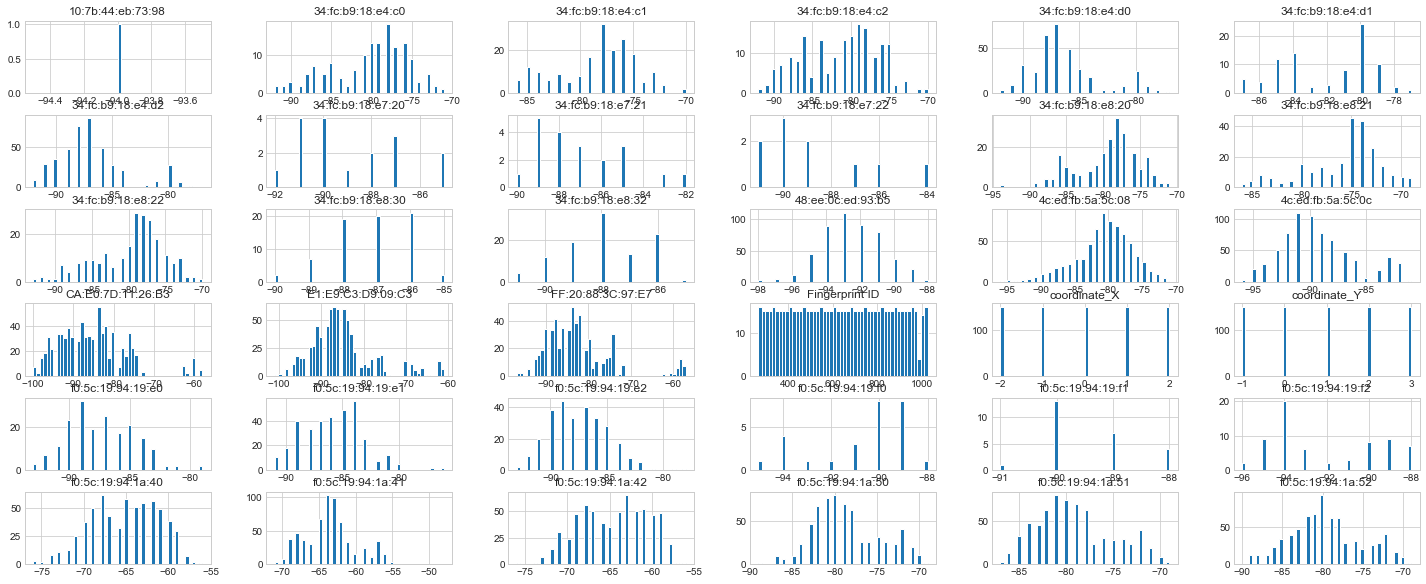

In [9]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Zone
Graphical display of the zones scanned in the experiment

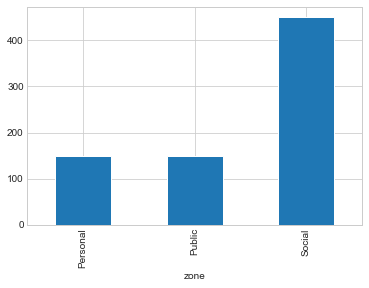

In [10]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

<BarContainer object of 30 artists>

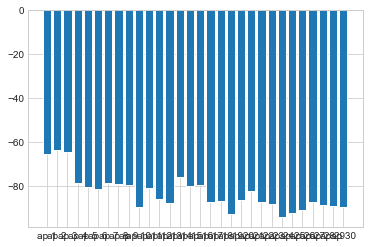

In [11]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.islower() == False:
        first_beacon_index = list(dataset.iloc[:,4:]).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

<BarContainer object of 3 artists>

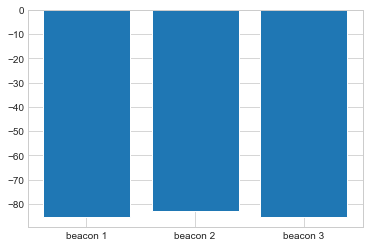

In [12]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

## Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

### Wifi Signal Strength

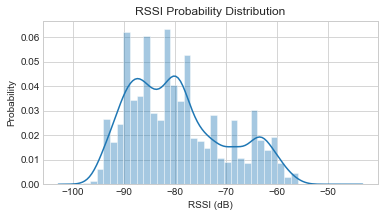

In [13]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset.iloc[:,4:].iloc[:,:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Bluetooth Signal Strength

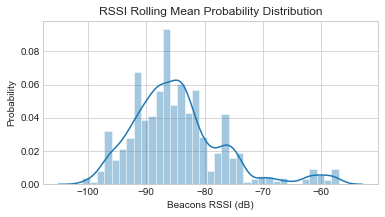

In [14]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,4:].iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [15]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [16]:
compute_correlations(dataset)

Fingerprint ID  coordinate_X  coordinate_Y  \
Fingerprint ID           1.000000      0.366251     -0.566946   
coordinate_X             0.366251      1.000000      0.000000   
coordinate_Y            -0.566946      0.000000      1.000000   
f0:5c:19:94:1a:40        0.032462      0.280135      0.053322   
f0:5c:19:94:1a:41        0.242338      0.416280     -0.071948   
f0:5c:19:94:1a:42        0.033822      0.287384      0.053766   
34:fc:b9:18:e4:c1       -0.139389      0.064912      0.137335   
34:fc:b9:18:e4:c0       -0.117810      0.171978      0.016277   
34:fc:b9:18:e4:c2       -0.001366      0.200114     -0.044580   
f0:5c:19:94:1a:50        0.508888      0.225635     -0.062025   
f0:5c:19:94:1a:51        0.396653      0.154204      0.016996   
f0:5c:19:94:1a:52        0.410779      0.175353     -0.006813   
4c:ed:fb:5a:5c:0c        0.387284      0.138658     -0.002532   
4c:ed:fb:5a:5c:08       -0.125609      0.083452      0.162620   
f0:5c:19:94:19:e1        0.225679      0.180819     -0.071232   
f0:5c:19:94:19:e2        0.258287      0.324229     -0.203365   
34:fc:b9:18:e8:21        0.095567     -0.436132     -0.045630   
34:fc:b9:18:e8:22       -0.184106     -0.325715      0.137012   
34:fc:b9:18:e8:20       -0.151016     -0.324171      0.126985   
f0:5c:19:94:19:e0        0.289709      0.255014     -0.267063   
34:fc:b9:18:e4:d2       -0.039181     -0.125951      0.157013   
48:ee:0c:ed:93:b5        0.102343      0.089620     -0.081692   
34:fc:b9:18:e4:d0       -0.214649     -0.117911      0.298540   
34:fc:b9:18:e4:d1       -0.641835     -0.577593     -0.093789   
34:fc:b9:18:e8:30       -0.434754     -0.307743      0.547200   
34:fc:b9:18:e8:32       -0.169819     -0.353095      0.298193   
10:7b:44:eb:73:98             NaN           NaN           NaN   
f0:5c:19:94:19:f2        0.748611           NaN      0.832861   
f0:5c:19:94:19:f0        0.837234           NaN      0.857329   
34:fc:b9:18:e7:21       -0.071316     -0.623570     -0.333712   
34:fc:b9:18:e7:22       -0.227020     -0.854697     -0.592749   
34:fc:b9:18:e7:20       -0.675707     -0.919701     -0.812240   
f0:5c:19:94:19:f1       -0.133456           NaN           NaN   
E1:E9:C3:D9:09:C3        0.109751     -0.558757     -0.425166   
FF:20:88:3C:97:E7       -0.202906     -0.413933      0.318924   
CA:E0:7D:11:26:B3        0.301147      0.148591     -0.666386   

                   f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
Fingerprint ID              0.032462           0.242338           0.033822   
coordinate_X                0.280135           0.416280           0.287384   
coordinate_Y                0.053322          -0.071948           0.053766   
f0:5c:19:94:1a:40           1.000000           0.588375           0.899034   
f0:5c:19:94:1a:41           0.588375           1.000000           0.617635   
f0:5c:19:94:1a:42           0.899034           0.617635           1.000000   
34:fc:b9:18:e4:c1          -0.118245           0.056372          -0.096208   
34:fc:b9:18:e4:c0          -0.239832          -0.085792          -0.213136   
34:fc:b9:18:e4:c2          -0.170579           0.000745          -0.180547   
f0:5c:19:94:1a:50           0.047614           0.185243           0.080835   
f0:5c:19:94:1a:51           0.041851           0.169981           0.076604   
f0:5c:19:94:1a:52           0.014849           0.206879           0.048076   
4c:ed:fb:5a:5c:0c           0.256296           0.305813           0.265746   
4c:ed:fb:5a:5c:08           0.048229          -0.075076           0.058237   
f0:5c:19:94:19:e1           0.109968           0.372364           0.165445   
f0:5c:19:94:19:e2           0.185223           0.354054           0.249712   
34:fc:b9:18:e8:21          -0.119467           0.091196          -0.072939   
34:fc:b9:18:e8:22          -0.167929          -0.060037          -0.104376   
34:fc:b9:18:e8:20          -0.078970          -0.048271          -0.006674   
f0:5c:19:94:19:e0           0.133278           0.2244

### Data cleaning
Fill in missing values and fix/remove outliers

In [17]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [18]:
for x in dataset.iloc[:,4:]:
    display(x)
    compute_data_cleaning(dataset,x)
display(dataset)

'f0:5c:19:94:1a:40'

'f0:5c:19:94:1a:41'

'f0:5c:19:94:1a:42'

'34:fc:b9:18:e4:c1'

'34:fc:b9:18:e4:c0'

'34:fc:b9:18:e4:c2'

'f0:5c:19:94:1a:50'

'f0:5c:19:94:1a:51'

'f0:5c:19:94:1a:52'

'4c:ed:fb:5a:5c:0c'

'4c:ed:fb:5a:5c:08'

'f0:5c:19:94:19:e1'

'f0:5c:19:94:19:e2'

'34:fc:b9:18:e8:21'

'34:fc:b9:18:e8:22'

'34:fc:b9:18:e8:20'

'f0:5c:19:94:19:e0'

'34:fc:b9:18:e4:d2'

'48:ee:0c:ed:93:b5'

'34:fc:b9:18:e4:d0'

'34:fc:b9:18:e4:d1'

'34:fc:b9:18:e8:30'

'34:fc:b9:18:e8:32'

'10:7b:44:eb:73:98'

'f0:5c:19:94:19:f2'

'f0:5c:19:94:19:f0'

'34:fc:b9:18:e7:21'

'34:fc:b9:18:e7:22'

'34:fc:b9:18:e7:20'

'f0:5c:19:94:19:f1'

'E1:E9:C3:D9:09:C3'

'FF:20:88:3C:97:E7'

'CA:E0:7D:11:26:B3'

Fingerprint ID  coordinate_X  coordinate_Y      zone  f0:5c:19:94:1a:40  \
0               265           1.0           3.0  Personal             -62.00   
1               266           1.0           3.0  Personal             -62.00   
2               267           1.0           3.0  Personal             -63.00   
3               268           1.0           3.0  Personal             -63.00   
4               269           1.0           3.0  Personal             -63.00   
..              ...           ...           ...       ...                ...   
745            1022           2.0           3.0  Personal             -76.76   
746            1023           2.0           3.0  Personal             -76.76   
747            1024           2.0           3.0  Personal             -76.76   
748            1025           2.0           3.0  Personal             -76.76   
749            1026           2.0           3.0  Personal             -76.76   

     f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  34:fc:b9:18:e4:c1  \
0               -65.00             -63.00             -76.00   
1               -61.00             -62.00             -77.00   
2               -62.00             -62.00             -86.86   
3               -61.00             -63.00             -86.86   
4               -61.00             -63.00             -76.00   
..                 ...                ...                ...   
745             -71.71             -76.76             -86.86   
746             -71.71             -76.76             -86.86   
747             -71.71             -76.76             -86.86   
748             -71.71             -76.76             -86.86   
749             -71.71             -76.76             -86.86   

     34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  ...  10:7b:44:eb:73:98  \
0               -78.00             -79.00  ...             -94.94   
1               -78.00             -78.00  ...             -94.94   
2               -92.92             -92.92  ...             -94.94   
3               -92.92             -92.92  ...             -94.94   
4               -78.00             -78.00  ...             -94.94   
..                 ...                ...  ...                ...   
745             -92.92             -92.92  ...             -94.94   
746             -92.92             -92.92  ...             -94.94   
747             -92.92             -92.92  ...             -94.94   
748             -92.92             -92.92  ...             -94.94   
749             -92.92             -92.92  ...             -94.94   

     f0:5c:19:94:19:f2  f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  \
0               -96.96             -95.95              -90.9   
1               -96.96             -95.95              -90.9   
2               -96.96             -95.95              -90.9   
3               -96.96             -95.95              -90.9   
4               -96.96             -95.95              -90.9   
..                 ...                ...                ...   
745             -90.00             -89.00              -90.9   
746             -88.00             -95.95              -90.9   
747             -89.00             -90.00              -90.9   
748             -91.00             -89.00              -90.9   
749             -91.00             -92.00              -90.9   

     34:fc:b9:18:e7:22  34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  \
0               -91.91             -92.92             -91.91   
1               -91.91             -92.92             -91.91   
2               -91.91             -92.92             -91.91   
3               -91.91             -92.92             -91.91   
4               -91.91             -92.92             -91.91   
..                 ...                ...                ...   
745             -91.91             -92.92             -90.00   
746             -91.91             -92.92             -90.00   
747             -91.91             -92.92             -90.00   
748             -91.91             -9

### Initialize Training Data
Training Data intialization for predictions purposes

In [19]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0               -62.00             -65.00             -63.00   
1               -62.00             -61.00             -62.00   
2               -63.00             -62.00             -62.00   
3               -63.00             -61.00             -63.00   
4               -63.00             -61.00             -63.00   
..                 ...                ...                ...   
745             -76.76             -71.71             -76.76   
746             -76.76             -71.71             -76.76   
747             -76.76             -71.71             -76.76   
748             -76.76             -71.71             -76.76   
749             -76.76             -71.71             -76.76   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0               -76.00             -78.00             -79.00   
1               -77.00             -78.00             -78.00   
2               -86.86             -92.92             -92.92   
3               -86.86             -92.92             -92.92   
4               -76.00             -78.00             -78.00   
..                 ...                ...                ...   
745             -86.86             -92.92             -92.92   
746             -86.86             -92.92             -92.92   
747             -86.86             -92.92             -92.92   
748             -86.86             -92.92             -92.92   
749             -86.86             -92.92             -92.92   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  f0:5c:19:94:19:e0  34:fc:b9:18:e4:d2  \
0                -89.0  ...             -93.93             -92.92   
1                -90.0  ...             -93.93             -92.92   
2                -90.0  ...             -87.00             -92.92   
3                -90.0  ...             -93.93             -92.92   
4                -90.0  ...             -88.00             -92.92   
..                 ...  ...                ...                ...   
745              -83.0  ...             -93.93             -86.00   
746              -83.0  ...             -93.93             -86.00   
747              -83.0  ...             -93.93             -87.00   
748              -83.0  ...             -93.93             -85.00   
749              -83.0  ...             -93.93             -87.00   

     48:ee:0c:ed:93:b5  34:fc:b9:18:e4:d0  34:fc:b9:18:e4:d1  \
0               -98.98             -92.92             -87.87   
1               -98.98             -92.92             -87.87   
2               -98.98             -92.92             -87.87   
3               -98.98             -92.92             -87.87   
4               -98.98             -92.92             -87.87   
..                 ...                ...                ...   
745             -98.98             -86.00             -87.87   
746             -92.00             -86.00             -86.00   
747             -93.00             -88.00             -87.87   
748             -92.00             -86.00             -85.00   
749             -95.00             -87.00             -87.87   

     34:fc:b9:18:e8:30  34:fc:b9:18:e8:32  10:7b:44:eb:73:98  \
0                -90.9             -

(750, 26)

In [20]:
train_ble = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

E1:E9:C3:D9:09:C3  FF:20:88:3C:97:E7  CA:E0:7D:11:26:B3
0                -86.0              -88.0                -96
1                -96.0              -88.0                -96
2                -94.0              -92.0                -98
3                -92.0              -89.0                -96
4                -96.0              -89.0                -93
..                 ...                ...                ...
745              -95.0              -84.0                -95
746              -94.0              -83.0                -92
747              -92.0              -84.0                -91
748              -93.0              -84.0                -93
749              -97.0              -82.0                -93

[750 rows x 3 columns]

(750, 3)

In [21]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)

f0:5c:19:94:1a:40  f0:5c:19:94:1a:41  f0:5c:19:94:1a:42  \
0               -62.00             -65.00             -63.00   
1               -62.00             -61.00             -62.00   
2               -63.00             -62.00             -62.00   
3               -63.00             -61.00             -63.00   
4               -63.00             -61.00             -63.00   
..                 ...                ...                ...   
745             -76.76             -71.71             -76.76   
746             -76.76             -71.71             -76.76   
747             -76.76             -71.71             -76.76   
748             -76.76             -71.71             -76.76   
749             -76.76             -71.71             -76.76   

     34:fc:b9:18:e4:c1  34:fc:b9:18:e4:c0  34:fc:b9:18:e4:c2  \
0               -76.00             -78.00             -79.00   
1               -77.00             -78.00             -78.00   
2               -86.86             -92.92             -92.92   
3               -86.86             -92.92             -92.92   
4               -76.00             -78.00             -78.00   
..                 ...                ...                ...   
745             -86.86             -92.92             -92.92   
746             -86.86             -92.92             -92.92   
747             -86.86             -92.92             -92.92   
748             -86.86             -92.92             -92.92   
749             -86.86             -92.92             -92.92   

     f0:5c:19:94:1a:50  f0:5c:19:94:1a:51  f0:5c:19:94:1a:52  \
0                -80.0              -80.0              -80.0   
1                -80.0              -81.0              -80.0   
2                -80.0              -79.0              -80.0   
3                -81.0              -81.0              -81.0   
4                -80.0              -80.0              -81.0   
..                 ...                ...                ...   
745              -71.0              -73.0              -73.0   
746              -72.0              -74.0              -73.0   
747              -72.0              -73.0              -73.0   
748              -74.0              -72.0              -73.0   
749              -71.0              -72.0              -72.0   

     4c:ed:fb:5a:5c:0c  ...  10:7b:44:eb:73:98  f0:5c:19:94:19:f2  \
0                -89.0  ...             -94.94             -96.96   
1                -90.0  ...             -94.94             -96.96   
2                -90.0  ...             -94.94             -96.96   
3                -90.0  ...             -94.94             -96.96   
4                -90.0  ...             -94.94             -96.96   
..                 ...  ...                ...                ...   
745              -83.0  ...             -94.94             -90.00   
746              -83.0  ...             -94.94             -88.00   
747              -83.0  ...             -94.94             -89.00   
748              -83.0  ...             -94.94             -91.00   
749              -83.0  ...             -94.94             -91.00   

     f0:5c:19:94:19:f0  34:fc:b9:18:e7:21  34:fc:b9:18:e7:22  \
0               -95.95              -90.9             -91.91   
1               -95.95              -90.9             -91.91   
2               -95.95              -90.9             -91.91   
3               -95.95              -90.9             -91.91   
4               -95.95              -90.9             -91.91   
..                 ...                ...                ...   
745             -89.00              -90.9             -91.91   
746             -95.95              -90.9             -91.91   
747             -90.00              -90.9             -91.91   
748             -89.00              -90.9             -91.91   
749             -92.00              -90.9             -91.91   

     34:fc:b9:18:e7:20  f0:5c:19:94:19:f1  E1:E9:C3:D9:09:C3  \
0               -92.92             -

(750, 33)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [22]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [23]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed
train_Y = dataset['labels'].values.reshape(-1,1)

Previous Categorical Data


zone
0    Personal
1    Personal
2    Personal
3    Personal
4    Personal
..        ...
745  Personal
746  Personal
747  Personal
748  Personal
749  Personal

[750 rows x 1 columns]

After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Plot Training Data
Graphical Display of the observations in the dataset

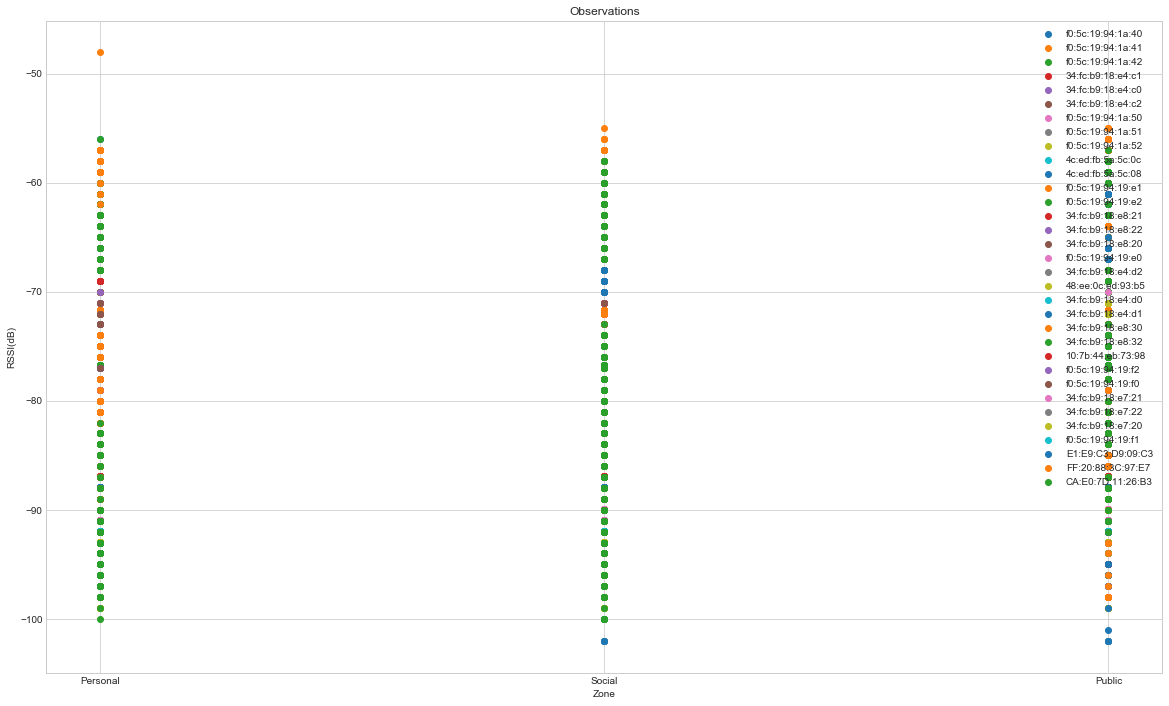

In [24]:
plt.figure(figsize=(20,12))
num = 0
palette = plt.get_cmap('Set1')
for x in X_train:
    num += 1
    plt.scatter(dataset['zone'],dataset[x],label=x,cmap='Sequential')
plt.title('Observations')
plt.xlabel('Zone')  
plt.ylabel('RSSI(dB)')  
plt.legend(loc='upper right');
plt.show()

### Initialize Hyperparameters for tunning

In [25]:
#SVM Configurable Arrays
C_parameter_list = [0.25,0.5,1.0,10.0,100.0,1000.0] 
kernel_list = ["linear","poly","rbf","sigmoid"]
filters_list = ["Median","Mean","No Filter"]
gamma_list = [10,100,"scale","auto"]
scaler_list = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
class_weights_list = ["balanced",None]
decision_function_shape_list = ["ovo","ovr"]
svc_basic = SVC()
print("DEFAULT HYPERPARAMETERS")
default_params = svc_basic.get_params()
display(pd.DataFrame(default_params,index=[1]))

DEFAULT HYPERPARAMETERS


C  break_ties  cache_size class_weight  coef0 decision_function_shape  \
1  1.0       False         200         None    0.0                     ovr   

   degree  gamma kernel  max_iter  probability random_state  shrinking    tol  \
1       3  scale    rbf        -1        False         None       True  0.001   

   verbose  
1    False

### Statistics Output Format
Structure of the statistical output of each call to the SVM Classification Function

In [26]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([0.03942665, 0.05384279, 0.03925105, 0.00632729, 0.00443613,
       0.00506164, 0.03974453, 0.03780782, 0.03730534, 0.09102184,
       0.03124262, 0.0808389 , 0.03095788, 0.00984547, 0.00642477,
       0.00463384, 0.01588658, 0.02020176, 0.01831969, 0.02877135,
       0.00568124, 0.0229712 , 0.03228934, 0.        , 0.03223788,
       0.00766952, 0.00090902, 0.00088089, 0.00099905, 0.01699221,
       0.08028864, 0.0521867 , 0.14554635])

CA:E0:7D:11:26:B3    0.145546
4c:ed:fb:5a:5c:0c    0.091022
f0:5c:19:94:19:e1    0.080839
E1:E9:C3:D9:09:C3    0.080289
f0:5c:19:94:1a:41    0.053843
FF:20:88:3C:97:E7    0.052187
f0:5c:19:94:1a:50    0.039745
f0:5c:19:94:1a:40    0.039427
f0:5c:19:94:1a:42    0.039251
f0:5c:19:94:1a:51    0.037808
f0:5c:19:94:1a:52    0.037305
34:fc:b9:18:e8:32    0.032289
f0:5c:19:94:19:f2    0.032238
4c:ed:fb:5a:5c:08    0.031243
f0:5c:19:94:19:e2    0.030958
34:fc:b9:18:e4:d0    0.028771
34:fc:b9:18:e8:30    0.022971
34:fc:b9:18:e4:d2    0.020202
48:ee:0c:ed:93:b5    0.018320
f0:5c:19:94:19:f1    0.016992
f0:5c:19:94:19:e0    0.015887
34:fc:b9:18:e8:21    0.009845
f0:5c:19:94:19:f0    0.007670
34:fc:b9:18:e8:22    0.006425
34:fc:b9:18:e4:c1    0.006327
34:fc:b9:18:e4:d1    0.005681
34:fc:b9:18:e4:c2    0.005062
34:fc:b9:18:e8:20    0.004634
34:fc:b9:18:e4:c0    0.004436
34:fc:b9:18:e7:20    0.000999
34:fc:b9:18:e7:21    0.000909
34:fc:b9:18:e7:22    0.000881
10:7b:44:eb:73:98    0.000000
dtype: flo

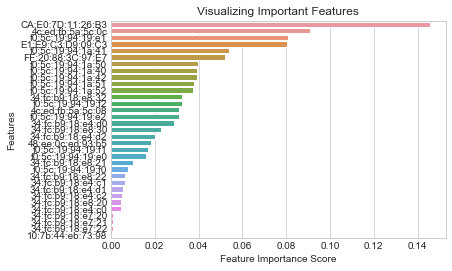

In [27]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestClassifier()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y.ravel())
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - SVM Classification Model

In [33]:
def compute_SVM_with_Classifier(flag = 0,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = StandardScaler(),
                                cross_validation = None,C_parameter = 1.0, kernel_parameter='rbf', gamma_parameter="scale", 
                                class_weigth_parameter=None, decision_function_shape_parameter='ovr'):
    # Init the SVM
    svm_classifier_estimator = SVC(C=C_parameter,kernel=kernel_parameter,gamma=gamma_parameter,class_weight=class_weigth_parameter,
                                  decision_function_shape=decision_function_shape_parameter,random_state = 42)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,svm_classifier_estimator)
    else:
        main_estimator = svm_classifier_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    statistics = pd.DataFrame(report).transpose()
    if flag == 2:
        error_dataframe = pd.DataFrame({'Actual': testY_data, 'Predicted':predict_test})
    else:
        error_dataframe = pd.DataFrame({'Actual': testY_data.flatten(), 'Predicted':predict_test.flatten()})
    if flag == 1:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(error_dataframe)
        error_dataframe.apply(pd.value_counts).plot(kind='bar', subplots=True)
    error = pd.DataFrame(np.where(error_dataframe['Actual'] != error_dataframe['Predicted'],1,0), columns=["error"])
    result = pd.DataFrame(train_Y,columns=["zone"]).join(error)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

### Experiments

#### Check Training model with no cross validation
Use SVM Classifier to check the results on the training data alone

Confusion Matrix:
[[144   0   6]
 [  1 142   7]
 [  4   9 437]]


precision    recall  f1-score  support
0              0.966443  0.960000  0.963211  150.000
1              0.940397  0.946667  0.943522  150.000
2              0.971111  0.971111  0.971111  450.000
accuracy       0.964000  0.964000  0.964000    0.964
macro avg      0.959317  0.959259  0.959281  750.000
weighted avg   0.964035  0.964000  0.964013  750.000

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

Confusion Matrix:
[[ 29   0 121]
 [  0 102  48]
 [  0  22 428]]


precision    recall  f1-score     support
0              1.000000  0.193333  0.324022  150.000000
1              0.822581  0.680000  0.744526  150.000000
2              0.716918  0.951111  0.817574  450.000000
accuracy       0.745333  0.745333  0.745333    0.745333
macro avg      0.846500  0.608148  0.628707  750.000000
weighted avg   0.794667  0.745333  0.704254  750.000000

Actual  Predicted
0         0          2
1         0          2
2         0          2
3         0          2
4         0          2
..      ...        ...
745       0          2
746       0          2
747       0          2
748       0          2
749       0          2

[750 rows x 2 columns]

Confusion Matrix:
[[144   0   6]
 [  0 149   1]
 [  3   4 443]]


precision    recall  f1-score     support
0              0.979592  0.960000  0.969697  150.000000
1              0.973856  0.993333  0.983498  150.000000
2              0.984444  0.984444  0.984444  450.000000
accuracy       0.981333  0.981333  0.981333    0.981333
macro avg      0.979297  0.979259  0.979213  750.000000
weighted avg   0.981356  0.981333  0.981306  750.000000

Actual  Predicted
0         0          0
1         0          0
2         0          0
3         0          0
4         0          0
..      ...        ...
745       0          0
746       0          0
747       0          0
748       0          0
749       0          0

[750 rows x 2 columns]

mae       mse      rmse  precision  accuracy  f1-score  type
2  0.018667  0.018667  0.136626   0.979980  0.981333  0.979915  Both
0  0.036000  0.036000  0.189737   0.960884  0.964000  0.960856  WiFi
1  0.254667  0.254667  0.504645   0.821000  0.745333  0.660736   BLE

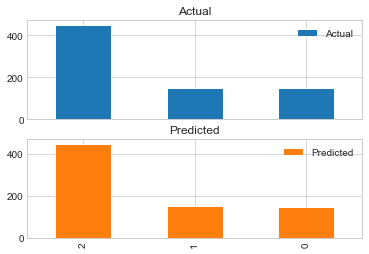

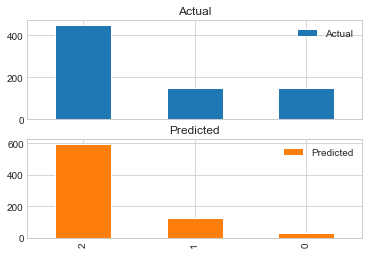

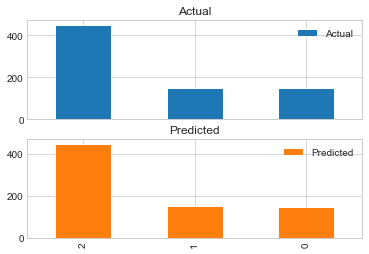

In [34]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_SVM_with_Classifier(flag=1,trainX_data=trainX_data,trainY_data=train_Y.ravel(),
                                   testX_data=trainX_data,testY_data=train_Y.ravel(),
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

#### Experiment - SVM with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

mae       mse      rmse  precision  accuracy  f1-score  folds  type
25  0.108000  0.108000  0.328634   0.884666  0.892000  0.884046      9  Both
26  0.112000  0.112000  0.334664   0.880563  0.888000  0.877433     10  Both
24  0.121333  0.121333  0.348329   0.871936  0.878667  0.867940      8  Both
23  0.138667  0.138667  0.372380   0.858084  0.861333  0.845498      7  Both
5   0.142667  0.142667  0.377712   0.851210  0.857333  0.837478      7  WiFi
7   0.154667  0.154667  0.393277   0.830365  0.845333  0.829555      9  WiFi
8   0.153333  0.153333  0.391578   0.840871  0.846667  0.828345     10  WiFi
6   0.161333  0.161333  0.401663   0.827919  0.838667  0.819956      8  WiFi
22  0.162667  0.162667  0.403320   0.830268  0.837333  0.818156      6  Both
4   0.173333  0.173333  0.416333   0.812007  0.826667  0.801871      6  WiFi
2   0.296000  0.296000  0.544059   0.695859  0.704000  0.637443      4  WiFi
17  0.298667  0.298667  0.546504   0.719454  0.701333  0.624329     10   BLE
20  0.337333  0.337333  0.580804   0.648362  0.662667  0.613226      4  Both
13  0.329333  0.329333  0.573876   0.655000  0.670667  0.584683      6   BLE
16  0.354667  0.354667  0.595539   0.621861  0.645333  0.572306      9   BLE
15  0.361333  0.361333  0.601110   0.608375  0.638667  0.567174      8   BLE
14  0.373333  0.373333  0.611010   0.586340  0.626667  0.564830      7   BLE
1   0.418667  0.418667  0.647045   0.536263  0.581333  0.534520      3  WiFi
0   0.418667  0.418667  0.647045   0.506860  0.581333  0.489962      2  WiFi
11  0.408000  0.408000  0.638749   0.541490  0.592000  0.477677      4   BLE
19  0.517333  0.517333  0.719259   0.465170  0.482667  0.452132      3  Both
18  0.449333  0.449333  0.670323   0.478622  0.550667  0.431347      2  Both
10  0.532000  0.532000  0.729383   0.410401  0.468000  0.404221      3   BLE
9   0.488000  0.488000  0.698570   0.426386  0.512000  0.399428      2   BLE
12  0.465333  0.465333  0.682153   0.360496  0.534667  0.378154      5   BLE
3   0.474667  0.474667  0.688961   0.327827  0.525333  0.338625      5  WiFi
21  0.518667  0.518667  0.720185   0.319159  0.481333  0.323473      5  Both

Number of Folds:  9


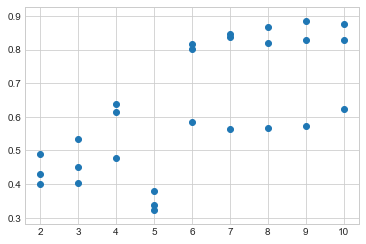

In [35]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['folds'],statistics['f1-score'])
selected_fold = statistics.sort_values(by=['f1-score'],ascending=False)['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

#### Experiment - SVM with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

mae       mse      rmse  precision  accuracy  f1-score  test_size  \
21  0.066667  0.066667  0.258199   0.937667  0.933333  0.927350        0.4   
22  0.069333  0.069333  0.263312   0.932975  0.930667  0.923263        0.5   
20  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631        0.3   
19  0.080000  0.080000  0.282843   0.928375  0.920000  0.912060        0.2   
23  0.086667  0.086667  0.294392   0.929361  0.913333  0.903151        0.6   
18  0.093333  0.093333  0.305505   0.894511  0.906667  0.894170        0.1   
24  0.099048  0.099048  0.314718   0.912451  0.900952  0.889474        0.7   
3   0.100000  0.100000  0.316228   0.903034  0.900000  0.888875        0.4   
4   0.101333  0.101333  0.318329   0.899146  0.898667  0.885609        0.5   
1   0.106667  0.106667  0.326599   0.897976  0.893333  0.882769        0.2   
0   0.120000  0.120000  0.346410   0.867652  0.880000  0.871573        0.1   
5   0.115556  0.115556  0.339935   0.892091  0.884444  0.865727        0.6   
2   0.120000  0.120000  0.346410   0.882657  0.880000  0.865366        0.3   
25  0.118333  0.118333  0.343996   0.905073  0.881667  0.864585        0.8   
6   0.127619  0.127619  0.357238   0.883153  0.872381  0.851856        0.7   
7   0.141667  0.141667  0.376386   0.868335  0.858333  0.830949        0.8   
9   0.213333  0.213333  0.461880   0.823958  0.786667  0.747008        0.1   
10  0.233333  0.233333  0.483046   0.820200  0.766667  0.707766        0.2   
26  0.232593  0.232593  0.482279   0.857738  0.767407  0.699636        0.9   
11  0.248889  0.248889  0.498888   0.813478  0.751111  0.682829        0.3   
14  0.248889  0.248889  0.498888   0.814486  0.751111  0.674799        0.6   
12  0.250000  0.250000  0.500000   0.827663  0.750000  0.671489        0.4   
15  0.274286  0.274286  0.523723   0.722388  0.725714  0.667453        0.7   
13  0.256000  0.256000  0.505964   0.816737  0.744000  0.663366        0.5   
16  0.276667  0.276667  0.525991   0.797872  0.723333  0.632429        0.8   
8   0.281481  0.281481  0.530548   0.788453  0.718519  0.616494        0.9   
17  0.282963  0.282963  0.531943   0.840841  0.717037  0.609687        0.9   

    type  
21  Both  
22  Both  
20  Both  
19  Both  
23  Both  
18  Both  
24  Both  
3   WiFi  
4   WiFi  
1   WiFi  
0   WiFi  
5   WiFi  
2   WiFi  
25  Both  
6   WiFi  
7   WiFi  
9    BLE  
10   BLE  
26  Both  
11   BLE  
14   BLE  
12   BLE  
15   BLE  
13   BLE  
16   BLE  
8   WiFi  
17   BLE

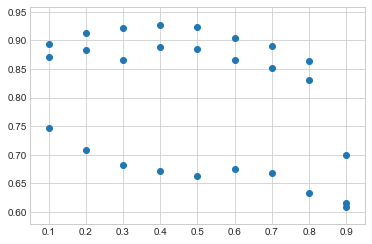

In [36]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = size, random_state = 42,stratify=train_Y)
        result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['test_size'],statistics['f1-score'])

#### Experiment - SVM with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [37]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

mae  mse  rmse  precision  accuracy  f1-score  type
0  1.0  1.0   1.0        0.0       0.0       0.0  WiFi
1  1.0  1.0   1.0        0.0       0.0       0.0   BLE
2  1.0  1.0   1.0        0.0       0.0       0.0  Both

#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using SVM

mae       mse      rmse  precision  accuracy  f1-score  \
7  0.066667  0.066667  0.258199   0.937667  0.933333  0.927350   
1  0.100000  0.100000  0.316228   0.903034  0.900000  0.888875   
8  0.108000  0.108000  0.328634   0.884666  0.892000  0.884046   
2  0.154667  0.154667  0.393277   0.830365  0.845333  0.829555   
4  0.250000  0.250000  0.500000   0.827663  0.750000  0.671489   
5  0.354667  0.354667  0.595539   0.621861  0.645333  0.572306   
0  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   
3  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   
6  1.000000  1.000000  1.000000   0.000000  0.000000  0.000000   

              method  type  
7            HoldOut  Both  
1            HoldOut  WiFi  
8  Stratified K-Fold  Both  
2  Stratified K-Fold  WiFi  
4            HoldOut   BLE  
5  Stratified K-Fold   BLE  
0                LOO  WiFi  
3                LOO   BLE  
6                LOO  Both

Selected cross validation method:  HoldOut


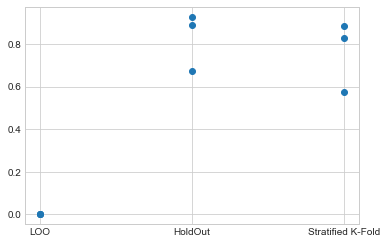

In [38]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
    holdout = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
    loo = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skfold = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),cross_validation = selected_fold)
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['method'],statistics['f1-score'],'o')
selected_method = "HoldOut"
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

mae       mse      rmse  precision  accuracy  f1-score  \
8   0.066667  0.066667  0.258199   0.937667  0.933333  0.927350   
9   0.073333  0.073333  0.270801   0.935377  0.926667  0.919153   
10  0.086667  0.086667  0.294392   0.921230  0.913333  0.904710   
0   0.100000  0.100000  0.316228   0.903034  0.900000  0.888875   
1   0.103333  0.103333  0.321455   0.901266  0.896667  0.881062   
2   0.133333  0.133333  0.365148   0.894712  0.866667  0.842676   
11  0.160000  0.160000  0.400000   0.882800  0.840000  0.807485   
4   0.250000  0.250000  0.500000   0.827663  0.750000  0.671489   
7   0.256667  0.256667  0.506623   0.804062  0.743333  0.665532   
5   0.256667  0.256667  0.506623   0.807274  0.743333  0.664422   
6   0.266667  0.266667  0.516398   0.799805  0.733333  0.651112   
3   0.320000  0.320000  0.565685   0.755910  0.680000  0.547563   

     preprocessing                                  preprocessingFunc  type  
8   StandardScaler  StandardScaler(copy=True, with_mean=True, with...  Both  
9     MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))  Both  
10    MaxAbsScaler                            MaxAbsScaler(copy=True)  Both  
0   StandardScaler  StandardScaler(copy=True, with_mean=True, with...  WiFi  
1     MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))  WiFi  
2     MaxAbsScaler                            MaxAbsScaler(copy=True)  WiFi  
11            None                                               None  Both  
4   StandardScaler  StandardScaler(copy=True, with_mean=True, with...   BLE  
7             None                                               None   BLE  
5     MinMaxScaler      MinMaxScaler(copy=True, feature_range=(0, 1))   BLE  
6     MaxAbsScaler                            MaxAbsScaler(copy=True)   BLE  
3             None                                               None  WiFi

Selected Preprocessing:  StandardScaler


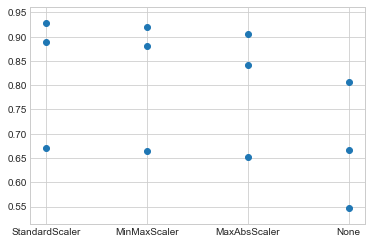

In [40]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for preprocess in scaler_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=preprocess,cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.4, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.scatter(statistics['preprocessing'],statistics['f1-score'])
selected_preprocessing = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['f1-score'],ascending=False)['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

#### Experiment - Running the SVC function with the different kernels¶

mae       mse      rmse  precision  accuracy  f1-score   kernel  type
10  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631      rbf  Both
8   0.120000  0.120000  0.346410   0.872696  0.880000  0.871648   linear  Both
2   0.120000  0.120000  0.346410   0.882657  0.880000  0.865366      rbf  WiFi
0   0.137778  0.137778  0.371184   0.850223  0.862222  0.846706   linear  WiFi
9   0.133333  0.133333  0.365148   0.900122  0.866667  0.835344     poly  Both
1   0.182222  0.182222  0.426875   0.870168  0.817778  0.774442     poly  WiFi
6   0.248889  0.248889  0.498888   0.813478  0.751111  0.682829      rbf   BLE
5   0.248889  0.248889  0.498888   0.819624  0.751111  0.680165     poly   BLE
11  0.355556  0.355556  0.596285   0.596851  0.644444  0.577824  sigmoid  Both
4   0.311111  0.311111  0.557773   0.838121  0.688889  0.555448   linear   BLE
7   0.475556  0.475556  0.689605   0.469383  0.524444  0.463117  sigmoid   BLE
3   0.471111  0.471111  0.686375   0.431991  0.528889  0.433722  sigmoid  WiFi

Selected Kernel:  rbf


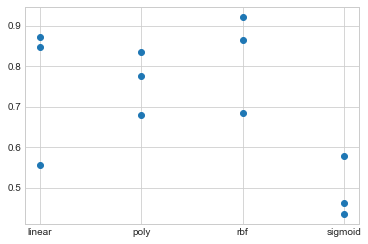

In [41]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','kernel','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for kernel in kernel_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),kernel_parameter=kernel,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),kernel_parameter=kernel,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),kernel_parameter=kernel)
        result.append(kernel)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['kernel'],statistics['f1-score'],'o')
selected_kernel = statistics.sort_values(by=['f1-score'],ascending=False)['kernel'].head(1).values[0]
print("Selected Kernel: ",selected_kernel)

#### Experiment - Running the SVC function with the different C parameters

mae       mse      rmse  precision  accuracy  f1-score  C_parameter  \
15  0.040000  0.040000  0.200000   0.959028  0.960000  0.954916        10.00   
17  0.053333  0.053333  0.230940   0.949041  0.946667  0.940293      1000.00   
16  0.053333  0.053333  0.230940   0.949041  0.946667  0.940293       100.00   
14  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631         1.00   
3   0.071111  0.071111  0.266667   0.936490  0.928889  0.920049        10.00   
4   0.080000  0.080000  0.282843   0.923844  0.920000  0.910967       100.00   
5   0.080000  0.080000  0.282843   0.923844  0.920000  0.910967      1000.00   
13  0.093333  0.093333  0.305505   0.930140  0.906667  0.894823         0.50   
2   0.120000  0.120000  0.346410   0.882657  0.880000  0.865366         1.00   
1   0.128889  0.128889  0.359011   0.878830  0.871111  0.852284         0.50   
12  0.160000  0.160000  0.400000   0.899085  0.840000  0.805394         0.25   
0   0.204444  0.204444  0.452155   0.843201  0.795556  0.746815         0.25   
11  0.253333  0.253333  0.503322   0.726944  0.746667  0.724896      1000.00   
9   0.231111  0.231111  0.480740   0.798257  0.768889  0.718194        10.00   
10  0.240000  0.240000  0.489898   0.755200  0.760000  0.716225       100.00   
7   0.235556  0.235556  0.485341   0.833251  0.764444  0.695544         0.50   
8   0.248889  0.248889  0.498888   0.813478  0.751111  0.682829         1.00   
6   0.253333  0.253333  0.503322   0.843066  0.746667  0.665343         0.25   

    type  
15  Both  
17  Both  
16  Both  
14  Both  
3   WiFi  
4   WiFi  
5   WiFi  
13  Both  
2   WiFi  
1   WiFi  
12  Both  
0   WiFi  
11   BLE  
9    BLE  
10   BLE  
7    BLE  
8    BLE  
6    BLE

Selected C Parameter:  10.0


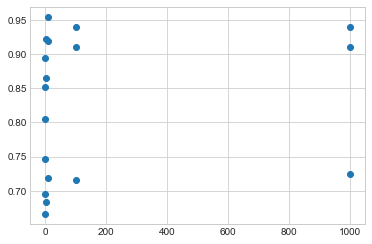

In [42]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','C_parameter','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for C_param in C_parameter_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),C_parameter=C_param,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),C_parameter=C_param,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),C_parameter=C_param)
        result.append(C_param)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['C_parameter'],statistics['f1-score'],'o')
selected_c_parameter = statistics.sort_values(by=['f1-score'],ascending=False)['C_parameter'].head(1).values[0]
print("Selected C Parameter: ",selected_c_parameter)

#### Experiment - Running the SVC function with the different gamma parameters

In [43]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','gamma','gammaStr','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for gamma_param in gamma_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),gamma_parameter=gamma_param)
        result.append(gamma_param)
        result.append(str(gamma_param))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
selected_gamma = statistics.sort_values(by=['f1-score'],ascending=False)['gamma'].head(1).values[0]
print("Selected Gamma: ",selected_gamma)

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classificat

mae       mse      rmse  precision  accuracy  f1-score  gamma  \
10  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631  scale   
11  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631   auto   
2   0.120000  0.120000  0.346410   0.882657  0.880000  0.865366  scale   
3   0.120000  0.120000  0.346410   0.882657  0.880000  0.865366   auto   
4   0.231111  0.231111  0.480740   0.776055  0.768889  0.734119     10   
6   0.248889  0.248889  0.498888   0.813478  0.751111  0.682829  scale   
7   0.248889  0.248889  0.498888   0.813478  0.751111  0.682829   auto   
5   0.355556  0.355556  0.596285   0.689681  0.644444  0.484842    100   
0   0.386667  0.386667  0.621825   0.553724  0.613333  0.377864     10   
1   0.400000  0.400000  0.632456   0.293333  0.600000  0.341667    100   
8   0.400000  0.400000  0.632456   0.293333  0.600000  0.341667     10   
9   0.400000  0.400000  0.632456   0.293333  0.600000  0.341667    100   

   gammaStr  type  
10    scale  Both  
11     auto  Both  
2     scale  WiFi  
3      auto  WiFi  
4        10   BLE  
6     scale   BLE  
7      auto   BLE  
5       100   BLE  
0        10  WiFi  
1       100  WiFi  
8        10  Both  
9       100  Both

Selected Gamma:  scale


#### Experiment - Running the SVC function with the different weights metrics

mae       mse      rmse  precision  accuracy  f1-score class_weights  \
4  0.057778  0.057778  0.240370   0.936150  0.942222  0.936165      balanced   
5  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631          None   
0  0.111111  0.111111  0.333333   0.881758  0.888889  0.880354      balanced   
1  0.120000  0.120000  0.346410   0.882657  0.880000  0.865366          None   
3  0.248889  0.248889  0.498888   0.813478  0.751111  0.682829          None   
2  0.373333  0.373333  0.611010   0.658647  0.626667  0.632675      balanced   

   type  
4  Both  
5  Both  
0  WiFi  
1  WiFi  
3   BLE  
2   BLE

Selected Class Weight:  balanced


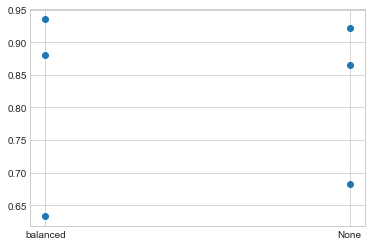

In [44]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','class_weights','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for weight in class_weights_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),class_weigth_parameter=weight,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),class_weigth_parameter=weight,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),class_weigth_parameter=weight)
        result.append(str(weight))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['class_weights'],statistics['f1-score'],'o')
selected_weight = statistics.sort_values(by=['f1-score'],ascending=False)['class_weights'].head(1).values[0]
print("Selected Class Weight: ",selected_weight)

#### Experiment: Running the SVC function with the different decision function metrics

mae       mse      rmse  precision  accuracy  f1-score  \
4  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631   
5  0.071111  0.071111  0.266667   0.940093  0.928889  0.921631   
0  0.120000  0.120000  0.346410   0.882657  0.880000  0.865366   
1  0.120000  0.120000  0.346410   0.882657  0.880000  0.865366   
2  0.248889  0.248889  0.498888   0.813478  0.751111  0.682829   
3  0.248889  0.248889  0.498888   0.813478  0.751111  0.682829   

  decision_function  type  
4               ovo  Both  
5               ovr  Both  
0               ovo  WiFi  
1               ovr  WiFi  
2               ovo   BLE  
3               ovr   BLE

Selected Decision:  ovo


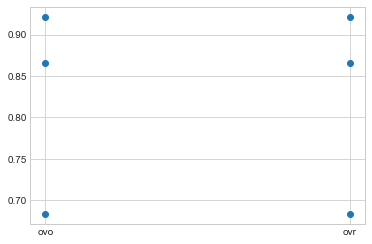

In [45]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','decision_function','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for decision in decision_function_shape_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision,
                                                 cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision,
                                                 cross_validation = selected_fold)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
            result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler = StandardScaler(),decision_function_shape_parameter=decision)
        result.append(str(decision))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))
plt.plot(statistics['decision_function'],statistics['f1-score'],'o')
selected_decision = statistics.sort_values(by=['f1-score'],ascending=False)['decision_function'].head(1).values[0]
print("Selected Decision: ",selected_decision)

### Run RandomizedSearchCV for parameter tunning

In [46]:
results = list()
tuned_parameters = {
    'svc__kernel':['rbf'],
    'svc__C':C_parameter_list,
    'svc__gamma':gamma_list
}
scores = ['f1_macro']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        pipe = Pipeline([('standardizer', StandardScaler()), ('svc', SVC())])
        clf = RandomizedSearchCV(
           pipe, param_distributions = tuned_parameters, n_iter = 75, cv=selected_fold,scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y.ravel())
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for f1_macro

Fitting 9 folds for each of 24 candidates, totalling 216 fits


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=75. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    8.1s finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=75. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 9 folds for each of 24 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    6.6s finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=75. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 9 folds for each of 24 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    8.8s finished


svc__kernel svc__gamma  svc__C     score  best_score  type
2         rbf      scale    10.0  f1_macro    0.894236  Both
0         rbf      scale   100.0  f1_macro    0.829352  WiFi
1         rbf      scale  1000.0  f1_macro    0.576113   BLE

### Best Parameters
Display the best parameters tunned throughout the experiments

In [47]:
conclusion_cols=['C Parameter','Cross Validation','Kernel','Preprocessing','Gamma','Class Weights','Decision Function']
conclusion_list = [selected_c_parameter,selected_method,selected_kernel,selected_preprocessing,selected_gamma,selected_weight,
                  selected_decision]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

C Parameter Cross Validation Kernel   Preprocessing  Gamma Class Weights  \
0         10.0          HoldOut    rbf  StandardScaler  scale      balanced   

  Decision Function  
0               ovo

### Best Results

In [48]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y.ravel(),groups=train_Y.ravel())
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = splited,
                            kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision) 
    elif selected_method =='Stratified K-Fold':
        result = compute_SVM_with_Classifier(testX_data=trainX_data,testY_data=train_Y.ravel(),scaler=StandardScaler(),
                                             cross_validation = selected_fold,
                            kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y.ravel(), test_size = 0.3, random_state = 42,stratify=train_Y)
        result = compute_SVM_with_Classifier(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                             scaler=StandardScaler(),kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             gamma_parameter=selected_gamma,decision_function_shape_parameter=selected_decision)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['f1-score'],ascending=False))

mae       mse      rmse  precision  accuracy  f1-score  type
2  0.040000  0.040000  0.200000   0.959028  0.960000  0.954916  Both
0  0.071111  0.071111  0.266667   0.936490  0.928889  0.920049  WiFi
1  0.231111  0.231111  0.480740   0.798257  0.768889  0.718194   BLE